In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#### Load data

In [10]:
data = pd.read_csv("population_sizes.csv")

In [11]:
data.head()

,report_month,churn,gain,total,registrations
0,2009-01-01,0.0,24.0,0.0,11946
1,2009-02-01,2.0,14.0,24.0,12049
2,2009-03-01,3.0,4.0,36.0,11697
3,2009-04-01,3.0,4.0,37.0,9582
4,2009-05-01,2.0,3.0,38.0,10052


In [12]:
len(data)

156

#### 1) Churn rate, conversion rate, regisztracio novekedesi utem, ami eszembe jut

Mivel nincs lemorzsolódó 2009 január elöttről azt feltételezem, hogy ekkor indul az egész biznisz úgy, ahogy van, vagyis az összes regisztrált száma egy kummulált összeg lesz.

In [28]:
data = data.assign(
    user_count = lambda x:x.registrations.cumsum(),
    churn_rate_per_subscriber = lambda x: x.churn / x.total,
    churn_rate_per_user = lambda x: x.churn / x.user_count,
    conv_rate_per_subscriber = lambda x: x.gain / x.total,
    conv_rate_per_user = lambda x:x.gain / x.user_count,
    reg_delta = lambda x: x.registrations / x.registrations.shift(1),
    churn_delta = lambda x: x.churn / x.churn.shift(1),
    gain_delta = lambda x: x.gain / x.gain.shift(1),
    date = lambda x: pd.to_datetime(x.report_month),
    year = lambda x: x.date.dt.year
)

In [29]:
data.head()

,report_month,churn,gain,total,registrations,user_count,churn_rate_per_subscribe,churn_rate_per_subscriber,churn_rate_per_user,conv_rate_per_subscriber,conv_rate_per_user,reg_delta,churn_delta,gain_delta,year,date
0,2009-01-01,0.0,24.0,0.0,11946,11946,NaN,NaN,0.000000,inf,0.002009,NaN,NaN,NaN,2009,2009-01-01
1,2009-02-01,2.0,14.0,24.0,12049,23995,0.083333,0.083333,0.000083,0.583333,0.000583,1.008622,inf,0.583333,2009,2009-02-01
2,2009-03-01,3.0,4.0,36.0,11697,35692,0.083333,0.083333,0.000084,0.111111,0.000112,0.970786,1.500000,0.285714,2009,2009-03-01
3,2009-04-01,3.0,4.0,37.0,9582,45274,0.081081,0.081081,0.000066,0.108108,0.000088,0.819184,1.000000,1.000000,2009,2009-04-01
4,2009-05-01,2.0,3.0,38.0,10052,55326,0.052632,0.052632,0.000036,0.078947,0.000054,1.049050,0.666667,0.750000,2009,2009-05-01


#### 2) Populáció dinamikája

A populáció alatt az előfizetőket és a regisztrálókat is érthetjük. Lesz egy, ezek abszolút értékét ábrázoló ábra és egy, ami az új előfizetők, regisztrálók, lemorzsolódók változásának az ütemét ábrázolja majd


##### a) Plot

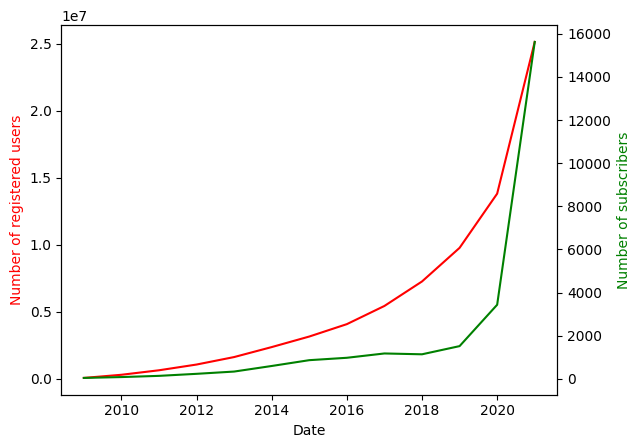

In [32]:
fig, ax1 = plt.subplots()
ax1.plot(data["year"].unique(),data.groupby("year")["user_count"].mean(),color = "red")
ax1.set_xlabel("Date")
ax1.set_ylabel("Number of registered users",color = "red")

ax2 = ax1.twinx()
ax2.plot(data["year"].unique(),data.groupby("year")["total"].mean(), color = "green")
ax2.set_ylabel("Number of subscribers",color = "green")
plt.show()

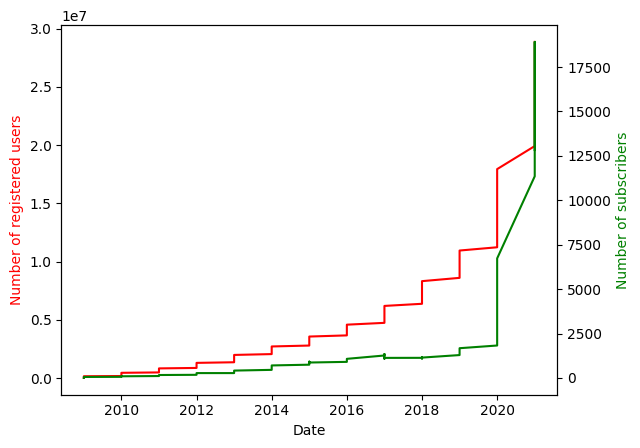

In [34]:
fig, ax1 = plt.subplots()
ax1.plot(data["year"],data["user_count"],color = "red")
ax1.set_xlabel("Date")
ax1.set_ylabel("Number of registered users",color = "red")

ax2 = ax1.twinx()
ax2.plot(data["year"],data["total"], color = "green")
ax2.set_ylabel("Number of subscribers",color = "green")
plt.show()

In [45]:
data.dtypes

report_month                  object
churn                        float64
gain                         float64
total                        float64
registrations                  int64
user_count                     int64
churn_rate_per_subscriber    float64
churn_rate_per_user          float64
conv_rate_per_subscriber     float64
conv_rate_per_user           float64
reg_delta                    float64
churn_delta                  float64
gain_delta                   float64
dtype: object